In [5]:
import pandas as pd 

In [6]:
data = pd.read_csv("../data/data_ug_detection.csv", names=["sidSecenek", "cinsiyet", "resimAdresi", "urunGrubu"]).sample(frac=1).reset_index(drop=True)
data.head() 

,sidSecenek,cinsiyet,resimAdresi,urunGrubu
0,517991,ERKEK,https://resim.aydinli.com.tr/02/1/0TH/S5015547...,HIRKA
1,796186,ERKEK COCUK,https://resim.aydinli.com.tr/08/3/078/S5026398...,pant
2,701103,ERKEK,https://resim.aydinli.com.tr/05/1/080/S5023066...,pant
3,772092,ERKEK COCUK,https://resim.aydinli.com.tr/08/3/0TK/S5025577...,KAZAK
4,630384,ERKEK,https://resim.aydinli.com.tr/02/1/011/S5020284...,tshirt


In [7]:
data.urunGrubu.value_counts() 

gomlek       9876
tshirt       9591
pant         8315
KAZAK        5187
sweat        4725
dis-giyim    3334
CEKET        3235
elbise       1507
HIRKA        1367
ETEK          352
Name: urunGrubu, dtype: int64

# Data Preparation 
## Gomlek 

In [8]:
df_gomlek = data[data.urunGrubu == "gomlek"].sample(frac=1) 

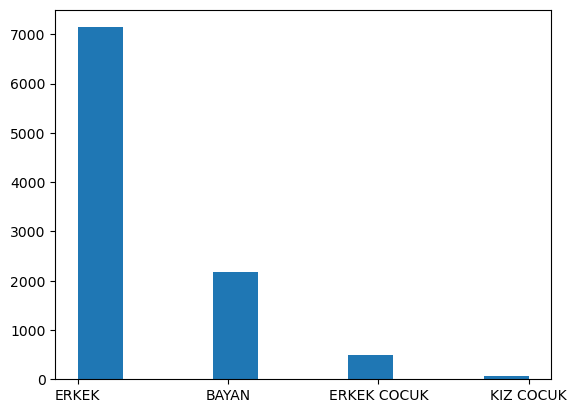

In [9]:
from matplotlib import pyplot as plt 

plt.hist(df_gomlek.cinsiyet)
plt.show()

In [10]:
df_gomlek.cinsiyet.value_counts() 

ERKEK          7142
BAYAN          2178
ERKEK COCUK     488
KIZ COCUK        68
Name: cinsiyet, dtype: int64

In [11]:
(2000 - (488 + 68))  / 2 

722.0

In [12]:
result_gomlek = pd.concat([
                            df_gomlek[df_gomlek.cinsiyet == 'KIZ COCUK'], 
                            df_gomlek[df_gomlek.cinsiyet == 'ERKEK COCUK'], 
                            df_gomlek[df_gomlek.cinsiyet == 'BAYAN'].sample(n=722), 
                            df_gomlek[df_gomlek.cinsiyet == "ERKEK"].sample(n=722)
                        ]).sample(frac=1).reset_index(drop=True)

In [13]:
result_gomlek["resimId"] = 1 

In [14]:
def change_img_id(dataframe: pd.DataFrame, nth: str = 2):
    dataframe["resimAdresi"] = dataframe["resimAdresi"].apply(lambda x: x.replace('-1.jpg', f'-{nth}.jpg'))
    dataframe["resimId"] = nth
    return dataframe  

In [15]:
copy1 = result_gomlek.copy()
copy1 = change_img_id(copy1) 

copy2 = result_gomlek.copy()
copy2 = change_img_id(copy2, nth=3)

result_gomlek = pd.concat([result_gomlek, copy1, copy2], axis=0).reset_index(drop=True) 

In [16]:
result_gomlek.shape

(6000, 5)

## tshirt

In [17]:
df_tshirt = data[data.urunGrubu == "tshirt"].sample(frac=1) 

df_tshirt.cinsiyet.value_counts() 

ERKEK          5657
BAYAN          2259
ERKEK COCUK    1196
KIZ COCUK       449
ERKEK BEBEK      17
KIZ BEBEK        13
Name: cinsiyet, dtype: int64

In [18]:
(2000 - (500+449)) / 2

525.5

In [19]:
result_tshirt = pd.concat([
                            df_tshirt[df_tshirt.cinsiyet == 'KIZ COCUK'], 
                            df_tshirt[df_tshirt.cinsiyet == 'ERKEK COCUK'].sample(n=500), 
                            df_tshirt[df_tshirt.cinsiyet == 'BAYAN'].sample(n=525), 
                            df_tshirt[df_tshirt.cinsiyet == "ERKEK"].sample(n=526)
                        ]).sample(frac=1).reset_index(drop=True)

In [20]:
result_tshirt.shape 

(2000, 4)

In [21]:
result_tshirt["resimId"] = 1 

copy1 = result_tshirt.copy()
copy1 = change_img_id(copy1) 

copy2 = result_tshirt.copy()
copy2 = change_img_id(copy2, nth=3)

result_tshirt = pd.concat([result_tshirt, copy1, copy2], axis=0).reset_index(drop=True) 
result_tshirt.shape

(6000, 5)

## pant

In [22]:
df_pant = data[data.urunGrubu == "pant"].sample(frac=1) 

df_pant.cinsiyet.value_counts() 

ERKEK          5251
BAYAN          1846
ERKEK COCUK     776
KIZ COCUK       422
KIZ BEBEK        11
ERKEK BEBEK       9
Name: cinsiyet, dtype: int64

In [23]:
(2000 - (776+422)) / 2

401.0

In [24]:
result_pant = pd.concat([
                            df_pant[df_pant.cinsiyet == 'KIZ COCUK'], 
                            df_pant[df_pant.cinsiyet == 'ERKEK COCUK'], 
                            df_pant[df_pant.cinsiyet == 'BAYAN'].sample(n=401), 
                            df_pant[df_pant.cinsiyet == "ERKEK"].sample(n=401)
                        ]).sample(frac=1).reset_index(drop=True)

result_pant["resimId"] = 1 
result_pant.shape 

(2000, 5)

In [25]:
copy1 = result_pant.copy()
copy1 = change_img_id(copy1) 

copy2 = result_pant.copy()
copy2 = change_img_id(copy2, nth=3)

result_pant = pd.concat([result_pant, copy1, copy2], axis=0).reset_index(drop=True).sample(frac=1).reset_index(drop=True) 
result_pant.shape

(6000, 5)

## KAZAK

In [26]:
df_KAZAK = data[data.urunGrubu == "KAZAK"].sample(frac=1) 

df_KAZAK.cinsiyet.value_counts() 

ERKEK          3314
BAYAN          1298
ERKEK COCUK     345
KIZ COCUK       226
KIZ BEBEK         2
ERKEK BEBEK       2
Name: cinsiyet, dtype: int64

In [27]:
(2000 - (345+226)) / 2

714.5

In [28]:
result_KAZAK = pd.concat([
                            df_KAZAK[df_KAZAK.cinsiyet == 'KIZ COCUK'], 
                            df_KAZAK[df_KAZAK.cinsiyet == 'ERKEK COCUK'], 
                            df_KAZAK[df_KAZAK.cinsiyet == 'BAYAN'].sample(n=715), 
                            df_KAZAK[df_KAZAK.cinsiyet == "ERKEK"].sample(n=714)
                        ]).sample(frac=1).reset_index(drop=True)

result_KAZAK["resimId"] = 1 
result_KAZAK.shape 

(2000, 5)

In [29]:
copy1 = result_KAZAK.copy()
copy1 = change_img_id(copy1) 

copy2 = result_KAZAK.copy()
copy2 = change_img_id(copy2, nth=3)

result_KAZAK = pd.concat([result_KAZAK, copy1, copy2], axis=0).reset_index(drop=True).sample(frac=1).reset_index(drop=True) 
result_KAZAK.shape

(6000, 5)

## sweat

In [30]:
df_sweat = data[data.urunGrubu == "sweat"].sample(frac=1) 

df_sweat.cinsiyet.value_counts() 

ERKEK          2207
BAYAN          1164
ERKEK COCUK     928
KIZ COCUK       422
ERKEK BEBEK       2
KIZ BEBEK         2
Name: cinsiyet, dtype: int64

In [31]:
(2000 - (500+422)) / 2

539.0

In [32]:
result_sweat = pd.concat([
                            df_sweat[df_sweat.cinsiyet == 'KIZ COCUK'], 
                            df_sweat[df_sweat.cinsiyet == 'ERKEK COCUK'].sample(n=500), 
                            df_sweat[df_sweat.cinsiyet == 'BAYAN'].sample(n=539), 
                            df_sweat[df_sweat.cinsiyet == "ERKEK"].sample(n=539)
                        ]).sample(frac=1).reset_index(drop=True)

result_sweat["resimId"] = 1 
result_sweat.shape 

(2000, 5)

In [33]:
copy1 = result_sweat.copy()
copy1 = change_img_id(copy1) 

copy2 = result_sweat.copy()
copy2 = change_img_id(copy2, nth=3)

result_sweat = pd.concat([result_sweat, copy1, copy2], axis=0).reset_index(drop=True).sample(frac=1).reset_index(drop=True) 
result_sweat.shape

(6000, 5)

## dis-giyim

In [34]:
df_disgiyim = data[data.urunGrubu == "dis-giyim"].sample(frac=1) 

df_disgiyim.cinsiyet.value_counts() 

ERKEK          2277
BAYAN           819
ERKEK COCUK     159
KIZ COCUK        79
Name: cinsiyet, dtype: int64

In [35]:
(2000 - (819+159+79))

943

In [36]:
result_disgiyim = pd.concat([
                            df_disgiyim[df_disgiyim.cinsiyet == 'KIZ COCUK'], 
                            df_disgiyim[df_disgiyim.cinsiyet == 'ERKEK COCUK'], 
                            df_disgiyim[df_disgiyim.cinsiyet == 'BAYAN'], 
                            df_disgiyim[df_disgiyim.cinsiyet == "ERKEK"].sample(n=943)
                        ]).sample(frac=1).reset_index(drop=True)

result_disgiyim["resimId"] = 1 
result_disgiyim.shape 

(2000, 5)

In [37]:
copy1 = result_disgiyim.copy()
copy1 = change_img_id(copy1) 

copy2 = result_disgiyim.copy()
copy2 = change_img_id(copy2, nth=3)

result_disgiyim = pd.concat([result_disgiyim, copy1, copy2], axis=0).reset_index(drop=True).sample(frac=1).reset_index(drop=True) 
result_disgiyim.shape

(6000, 5)

## CEKET

In [38]:
df_CEKET = data[data.urunGrubu == "CEKET"].sample(frac=1) 

df_CEKET.cinsiyet.value_counts() 

ERKEK          2935
BAYAN           276
ERKEK COCUK      22
KIZ COCUK         2
Name: cinsiyet, dtype: int64

In [39]:
(2000 - (22+2+276))

1700

In [40]:
result_CEKET = pd.concat([
                            df_CEKET[df_CEKET.cinsiyet == 'KIZ COCUK'], 
                            df_CEKET[df_CEKET.cinsiyet == 'ERKEK COCUK'], 
                            df_CEKET[df_CEKET.cinsiyet == 'BAYAN'], 
                            df_CEKET[df_CEKET.cinsiyet == "ERKEK"].sample(n=1700)
                        ]).sample(frac=1).reset_index(drop=True)

result_CEKET["resimId"] = 1 
result_CEKET.shape 

(2000, 5)

In [41]:
copy1 = result_CEKET.copy()
copy1 = change_img_id(copy1) 

copy2 = result_CEKET.copy()
copy2 = change_img_id(copy2, nth=3)

result_CEKET = pd.concat([result_CEKET, copy1, copy2], axis=0).reset_index(drop=True).sample(frac=1).reset_index(drop=True) 
result_CEKET.shape

(6000, 5)

## elbise

In [42]:
df_elbise = data[data.urunGrubu == "elbise"].sample(frac=1) 

df_elbise.cinsiyet.value_counts() 

BAYAN        1134
KIZ COCUK     364
KIZ BEBEK       9
Name: cinsiyet, dtype: int64

In [43]:
result_elbise = df_elbise.sample(frac=1).reset_index(drop=True)

result_elbise["resimId"] = 1 
result_elbise.shape 

(1507, 5)

In [44]:
copy1 = result_elbise.copy()
copy1 = change_img_id(copy1) 

copy2 = result_elbise.copy()
copy2 = change_img_id(copy2, nth=3)

result_elbise = pd.concat([result_elbise, copy1, copy2], axis=0).reset_index(drop=True).sample(frac=1).reset_index(drop=True) 
result_elbise.shape

(4521, 5)

## HIRKA

In [45]:
df_HIRKA = data[data.urunGrubu == "HIRKA"].sample(frac=1) 

df_HIRKA.cinsiyet.value_counts() 

ERKEK          588
BAYAN          577
ERKEK COCUK    102
KIZ COCUK      100
Name: cinsiyet, dtype: int64

In [46]:
result_HIRKA = df_HIRKA.sample(frac=1).reset_index(drop=True)

result_HIRKA["resimId"] = 1 
result_HIRKA.shape 

(1367, 5)

In [47]:
copy1 = result_HIRKA.copy()
copy1 = change_img_id(copy1) 

copy2 = result_HIRKA.copy()
copy2 = change_img_id(copy2, nth=3)

result_HIRKA = pd.concat([result_HIRKA, copy1, copy2], axis=0).reset_index(drop=True).sample(frac=1).reset_index(drop=True) 
result_HIRKA.shape

(4101, 5)

## ETEK

In [48]:
df_ETEK = data[data.urunGrubu == "ETEK"].sample(frac=1) 

df_ETEK.cinsiyet.value_counts() 

BAYAN        311
KIZ COCUK     41
Name: cinsiyet, dtype: int64

In [49]:
result_ETEK = df_ETEK.sample(frac=1).reset_index(drop=True)

result_ETEK["resimId"] = 1 
result_ETEK.shape 

(352, 5)

In [50]:
copy1 = result_ETEK.copy()
copy1 = change_img_id(copy1) 

copy2 = result_ETEK.copy()
copy2 = change_img_id(copy2, nth=3)

result_ETEK = pd.concat([result_ETEK, copy1, copy2], axis=0).reset_index(drop=True).sample(frac=1).reset_index(drop=True) 
result_ETEK.shape

(1056, 5)

## Merge Data 

In [53]:
result_data = pd.concat([result_gomlek, 
           result_tshirt, 
           result_pant, 
           result_KAZAK, 
           result_sweat, 
           result_disgiyim, 
           result_CEKET, 
           result_elbise, 
           result_HIRKA, 
           result_ETEK]).sample(frac=1).reset_index(drop=True)

result_data.shape

(51678, 5)

In [54]:
result_data.urunGrubu.value_counts() 

CEKET        6000
sweat        6000
tshirt       6000
gomlek       6000
dis-giyim    6000
KAZAK        6000
pant         6000
elbise       4521
HIRKA        4101
ETEK         1056
Name: urunGrubu, dtype: int64

In [55]:
result_data.to_csv("../data/extracted_data.csv") 